<a href="https://colab.research.google.com/github/Sana-Gupta/AcmProject/blob/master/VisulizeFilters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 #Downloading Dataset
!git clone https://github.com/spMohanty/PlantVillage-Dataset

Cloning into 'PlantVillage-Dataset'...
remote: Enumerating objects: 163229, done.
remote: Total 163229 (delta 0), reused 0 (delta 0), pack-reused 163229
Receiving objects: 100% (163229/163229), 2.00 GiB | 19.42 MiB/s, done.
Resolving deltas: 100% (99/99), done.
Checking out files: 100% (182401/182401), done.


In [ ]:
 #copy the data
!cp -R /content/PlantVillage-Dataset/raw /content/

In [ ]:
 #for removing any folder
!rm -r /content/Test

rm: cannot remove '/content/Test': No such file or directory


In [ ]:
 #Inserting Libraries
import numpy as np
import random
import shutil
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [ ]:
 def TestFileFolderCreate() :   
    randomFolder = random.randint(0,len(root_dir))
    folderName = root_dir[randomFolder]
    print(folderName)
    imageList = listdir(f"{directory_root}/{folderName}")
    randomImageNum = random.randint(0,len(imageList))
    ImageName = imageList[randomImageNum]
    print(ImageName)
    WriteFile(folderName,ImageName)
    src = f"{directory_root}/{folderName}/{ImageName}"
    des = '/content/Test/'
    shutil.move(src,des)

In [ ]:
 #Initializing Variables
EPOCHS = 25
INIT_LR = 1e-4
BS = 32
default_image_size = tuple((256, 256))
image_size = 0
directory_root = '/content/raw/color'
width=256
height=256
depth=3

In [ ]:
 root_dir = listdir(directory_root)
print("Number Of Folders : " + str(len(root_dir)))

Number Of Folders : 38


In [ ]:
 !mkdir Test

In [ ]:
 def WriteFile(ClassName,ImageName):
    f = open("TestFile.csv","a+")
    f.write(ClassName+"@#"+ImageName+"\n")

In [ ]:
 for i in range(0,10):
    print(i)
    TestFileFolderCreate()

0
Apple___Black_rot
4186abb2-d07c-495c-9596-db575c3f7051___JR_FrgE.S 2891.JPG
1
Blueberry___healthy
54398742-aaf4-4414-acc7-bbc4259a3fb0___RS_HL 5121.JPG
2
Apple___Cedar_apple_rust
11a41b2a-5bf3-458a-801c-0898dd280c1e___FREC_C.Rust 9874.JPG
3
Corn_(maize)___Northern_Leaf_Blight
1600d5c2-b322-475d-bdf2-5609095bee27___RS_NLB 3499.JPG
4
Tomato___Septoria_leaf_spot
3931a2cf-5122-47f2-bff0-509460130890___Matt.S_CG 1139.JPG
5
Apple___Black_rot
f2b3cfad-a6a4-4d2c-b56a-3f323b497e87___JR_FrgE.S 2780.JPG
6
Peach___healthy
cef5544c-c878-436b-b689-4826e0621ae2___Rutg._HL 2484.JPG
7
Tomato___healthy
3200dbab-2da4-49c9-bd74-34d67e763b22___RS_HL 0562.JPG
8
Grape___Esca_(Black_Measles)
8f27d644-c11c-4bc1-8ec3-1ac33575318e___FAM_B.Msls 4488.JPG
9
Cherry_(including_sour)___Powdery_mildew
2b4e1ad2-bea7-450b-9d25-35700becc958___FREC_Pwd.M 4805.JPG


[INFO] Loading Data 
Total Images : 54295


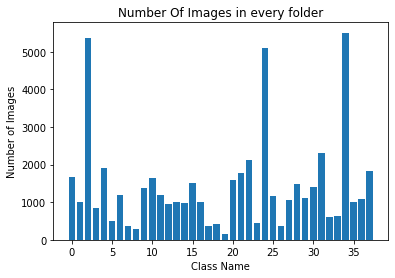

In [ ]:
 #Viewing Number of Images in Folder
print("[INFO] Loading Data ")
root_dir = listdir(directory_root)
sumP = 0
Y = []
for directory in root_dir :
    #print("[FOLDER] Loading Folder : "+str(directory))
    plant_disease_image_list = listdir(f"{directory_root}/{directory}")
    lenP = len(plant_disease_image_list)
    Y.append (lenP)
    #print("[IMAGES] Images : " + str(lenP))
    sumP += lenP
   
print("Total Images : " + str(sumP))
 
#BarGraph
plt.bar(range(0,len(root_dir)),Y)
plt.xlabel("Class Name")
plt.ylabel("Number of Images")
plt.title("Number Of Images in every folder")
plt.show()

In [ ]:
 dataGeneration = ImageDataGenerator(validation_split=0.2,rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.5,horizontal_flip=True,fill_mode="nearest")

In [ ]:
 trainGenerator = dataGeneration.flow_from_directory(
        '/content/raw/color/',
        target_size=(512,512),
        batch_size=128,
        class_mode='categorical',
        shuffle=True,
        subset='training')
print(trainGenerator)
#scroll krte jao
classes = trainGenerator.class_indices

Found 43450 images belonging to 38 classes.


In [ ]:
 def ClassesLabel(classes):
    j=0
    for i in classes :
        f = open("Classes.csv","a+")
        f.write(str(j)+"@#"+i+"\n")
        j = j+1

In [ ]:
 ClassesLabel(classes)

In [ ]:
  validGenerator = dataGeneration.flow_from_directory(
        '/content/raw/color/',
        target_size=(512,512),
        batch_size=128,
        class_mode='categorical',
        shuffle=True,
        subset='validation')

Found 10845 images belonging to 38 classes.


NameError: ignored

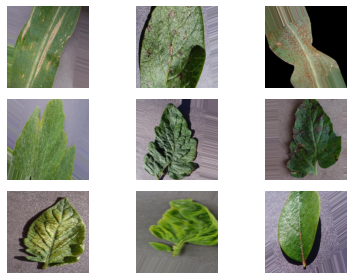

In [ ]:
 #ye aapko dekhayega images , validation ke liye ya jo testing ke liye images jayegi kis prakar Hai vo , random images dekhayega
 #scroll thoda saboutput aane vala. isme hmne random function to use nai kiya , nhi trainGenerator dekho likja hua , trainGe
for i in range(9):
    plt.subplot(3,3,i+1) 
    for x,y in trainGenerator: #ye jo yha likha hai , isme jo image sbse pehle aayegi vo dekhayega , print krega 9 images ko  random isliye Hya kuki , upar 
    #jb hmne trainGenerator bnata tha , vha bich mae dala tha shuffle = True
  
        plt.imshow((x[0]/255)) 
        #plt.title('y={}'.format(y[0]))
        plt.axis('off')
        break
plt.tight_layout()
plt.show()

#ye jo images hai , 10480 mae se random 9bimages dekhai isne. testing mae jo use krega ye
#vo images hai

#ye images traning ke liye jayegi algoritm nae , pehle vali jo dekhai
#vo testing / validation vali images dekhai thi...
#agar trainGenerator ki jgh validGenerator likhoge jo to validation ki images dekhayega
# in inages ko dhyan Se dekho , 2nd row 3rd image dekho , vha  kuch dekhega
#  ye jo ese image hui ImageDataGeneraotr ke krn huk , aage dekhenge ye kesenhui scroll kro aage.

In [ ]:
def generate_plot_pics(datagen,orig_img):
    dir_augmented_data = "/content/showGeneratedImage"
    try:
        ## if the preview folder does not exist, create
        os.mkdir(dir_augmented_data)
    except:
        ## if the preview folder exists, then remove
        ## the contents (pictures) in the folder
        for item in os.listdir(dir_augmented_data):
            os.remove(dir_augmented_data + "/" + item)
 
    ## convert the original image to array
    x = img_to_array(orig_img)
    ## reshape (Sampke, Nrow, Ncol, 3) 3 = R, G or B
    x = x.reshape((1,) + x.shape)
    ## -------------------------- ##
    ## randomly generate pictures
    ## -------------------------- ##
    i = 0
    Nplot = 8
    for batch in datagen.flow(x,batch_size=1,
                          save_to_dir=dir_augmented_data,
                          save_prefix="pic",
                          save_format='jpeg'):
        i += 1
        if i > Nplot - 1: ## generate 8 pictures 
            break
 
    ## -------------------------- ##
    ##   plot the generated data
    ## -------------------------- ##
    fig = plt.figure(figsize=(8, 6))
    fig.subplots_adjust(hspace=0.02,wspace=0.01,
                    left=0,right=1,bottom=0, top=1)
 
    ## original picture
    ax = fig.add_subplot(3, 3, 1,xticks=[],yticks=[])        
    ax.imshow(orig_img)
    ax.set_title("original")
 
    i = 2
    for imgnm in os.listdir(dir_augmented_data):
        ax = fig.add_subplot(3, 3, i,xticks=[],yticks=[]) 
        img = load_img(dir_augmented_data + "/" + imgnm)
        ax.imshow(img)
        i += 1
    plt.show()

In [ ]:
 #ab main start hua ImageDataGemerator  ko smjhne ka syste
 #mne koi b 1 file utali picture utali Test Folder mae se
 #vhi random ka use krke, dekho , ye to agya ki apne test vali file ti usme se uthay kya krna mene
 #Test folder mae se image uthai , usko hum ImageDataGenerator ke sath jodenge , ki kya ho rha 
# kya frk pdta hai jub hum imagedatagenerator use krte hai  ,  or ye abhi sirf 1 image pr krke dekhayega.okk
ImageFiles = listdir('/content/Test/')
randomNum = random.randint(0,len(ImageFiles))
imgPath = f"/content/Test/{ImageFiles[randomNum]}"
#is code se bs koi b random image utahi Test Folder se

In [ ]:
 from keras.preprocessing.image import load_img
import os

In [ ]:
 orig_img = image.load_img(imgPath)

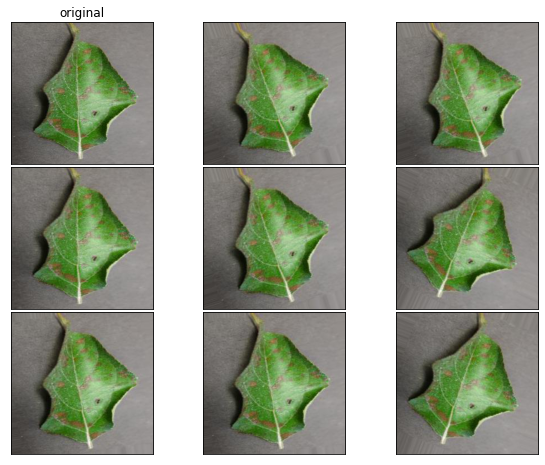

In [ ]:
 datagen = ImageDataGenerator(rotation_range=25) #yemtlb hmne isme 25 teh se ise image ko rotate kiya idr  
 # to random iage ayegi hanji , tbhi 1 min b ni lga change krne mae is code se
 #vrna hum address dalte copy krte image ka address tike lg jata.  , to random krdia 

# hum ij images kon save kr dete hai ese changes krke
# and jese hum ye single image ka dekhare , abhi 1 hi change kri rotatiom , aagr dekhna bhtt sari chije ikhati hogi , to vo sari ikhati hokr ek image bnayegi
#fr usko traning ke liye bhejte hai , jese ye mne to yha o images dekhai hai na , lekin jb bhtt sari chije krte , to
# 1 hi image jati hai ! traning ke liye.
generate_plot_pics(datagen,orig_img)


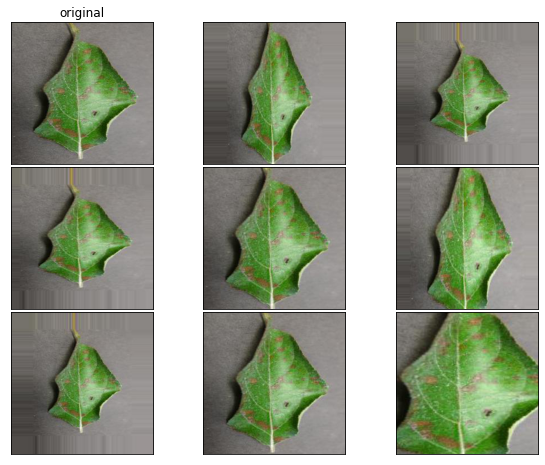

In [ ]:
  datagen = ImageDataGenerator(zoom_range=.5)
generate_plot_pics(datagen,orig_img) #yha dhyan se dekho jo zoom out vale hai , jese canter vali image 

# in images ko b dhyan se dekho , isme b kines aa
# ise fill_mode="nearest " kehte hai #aage pta chlega ye kya hota. 

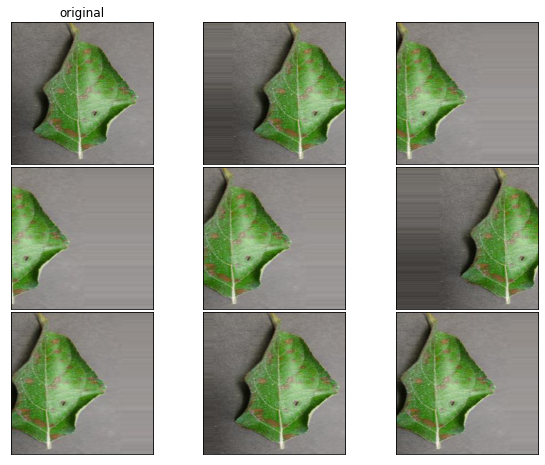

In [ ]:
  datagen = ImageDataGenerator(width_shift_range=0.5)
generate_plot_pics(datagen,orig_img)#ye 0.2 ko change krke ruk kro , apne mun se number dalo ese 

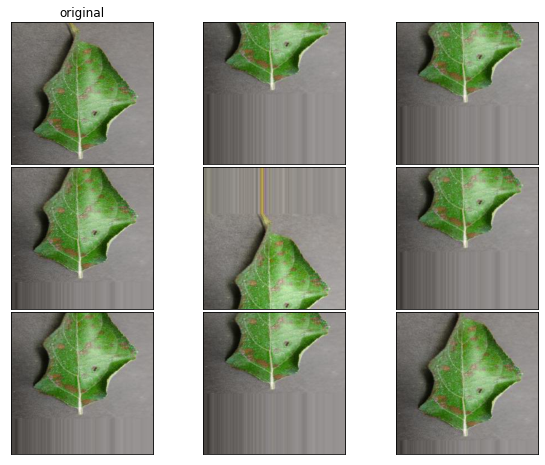

In [ ]:
  datagen = ImageDataGenerator(height_shift_range=0.5)## isse b help hogi , dekho jub hum photo khichenge prediction ke
  #liye to orignal image ke angle pr khade hokr thodi khichege hr bari , thodi image idar udar b ho skti photo mae
  # to isse hmara model ese ready hoga esi editing se kj kesi b image bhej do kisi b angle se ye predict krne ki koshish krenga ache result dega.
  generate_plot_pics(datagen,orig_img)
  

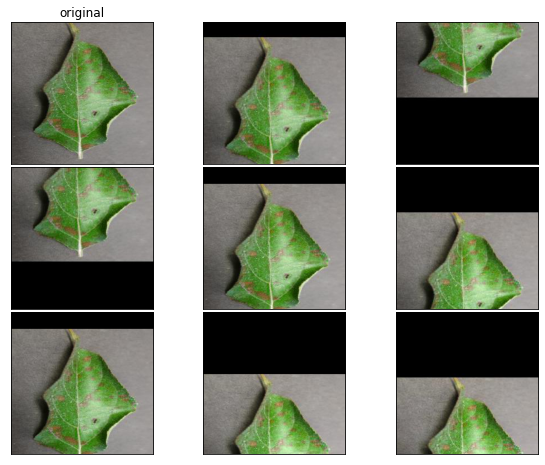

In [ ]:
 datagen = ImageDataGenerator(height_shift_range=0.5,fill_mode="nearest")
generate_plot_pics(datagen,orig_img) # nearest ki jgha krna  name changes, ye shift 0 5 krne ke baad jo extra space bchti hai na , usme fill krta hau
#refleclt- isme reflection daal dega sb , piche vala bcha to niche ki trf piche vala hissa hi reflect kr dega 
#wrap  - isme fill kra tha , agar upar vala hissa kata to vo niche ki trf ghusa dega , agar niche vala hissa ata to upar ki trf se ghusa dega ska 
#constant- ntlb  shift kra na 0m5 se to shift krne pr jo extra space thi use fill nhi krega khali chord dega 
#nearest (by default) isme krta hai , name se clear hai nearest , mtlb jo space khali bchi uske aas paas jo color hoga usi kenpixels ko bhr dega .

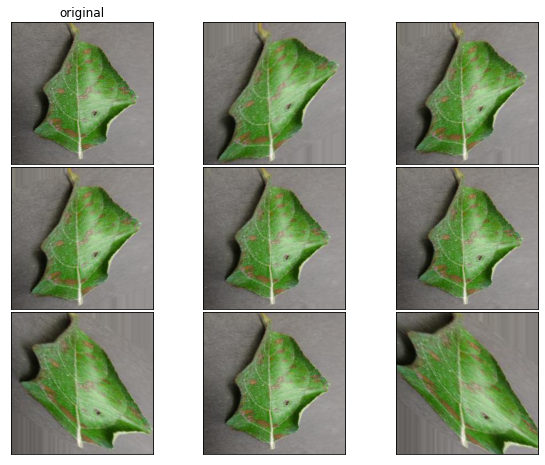

In [ ]:
  datagen = ImageDataGenerator(shear_range=55)
generate_plot_pics(datagen,orig_img)
#shear range ek drwaja smjho jisko aadha khola or door se dekh rhe ho , to vo slant dekhai deta teda sa..
#yhi kaam isem ho rha but hmari nazar mae aa nj ra bhtt thoda hai 

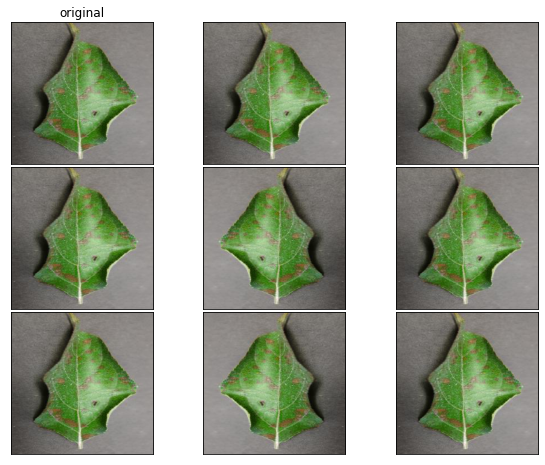

In [ ]:
  datagen = ImageDataGenerator(horizontal_flip=True)
generate_plot_pics(datagen,orig_img)#bs flip krdiya ise ,left to right right ko left 

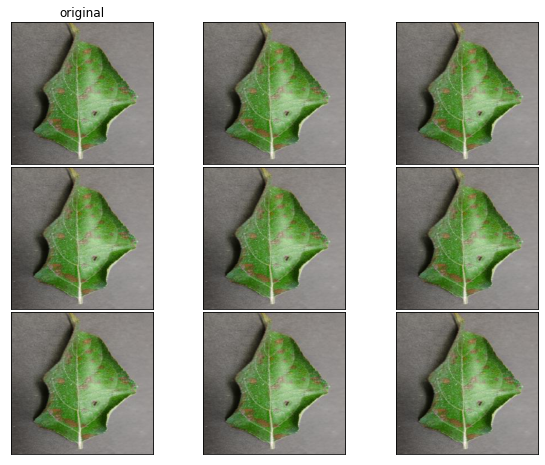

In [ ]:
  datagen = ImageDataGenerator(rescale=1./255)
generate_plot_pics(datagen,orig_img)
#isme kuch b ni hota bs jo values 0 to 255 hoti usko 0 to 1 kr deta hai hr value ko 255 se divide kr
#Deta hai , picture orignal hi ehti hai o, kjko orignal picture haj
#uske pixles kibramge 0 to 255 hai , and jo baki hai sbki 0 to 1 ki range hai 
#baki kuch alag nhi hai.

##ye values pta hai na , pixel value hoti ?hnji
#to pixel value ki ramge 0 to 255 hoti , chahe R ki ho ya Gvki ya B ki
# isme , hum /255 kr dete taki ye bdi bdi values hmari 0 se 1 aa jaye
# kuki usse calculatiom fast hogi and time km lagega vs
# 81 * 324 = ye krna okha lgta thoda time leta computer mae agar computerbke hisab se chle
#0.81 * 0.324 = ye krna conputer ke loye bhtt aasan hoga bhtt fas th nkjri  d



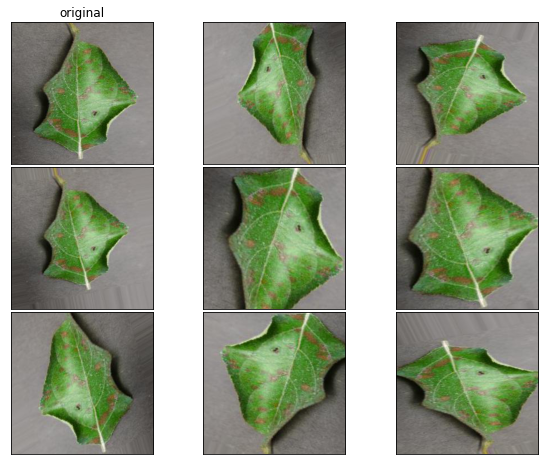

In [ ]:
datagen = ImageDataGenerator(rotation_range=25,horizontal_flip=True,fill_mode="nearest",shear_range=0.2,zoom_range=0.3,width_shift_range=0.1,height_shift_range=0.1,rescale=1./255,vertical_flip=True)
generate_plot_pics(datagen,orig_img) #yha sb mix kridya scroll krke Dekho 

In [ ]:
model = Sequential()
#ab main start hoga , ki jo hum CNN bna rhe ye actual mae dekh kesa rha hai
#hmari jo image hai , leave ki uske sath kya krra ye algotihm
#ye dekhenge ab hum , as image visulization 

In [ ]:
 inputShape = (224,224,3)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1
n_classes = 38
from keras.regularizers import l2

In [ ]:


model.add(Conv2D(32, (3, 3), padding="same",name="conv_1",kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01),input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.20))
model.add(Conv2D(64, (3, 3),kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01),name="conv_2",padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3),kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01),padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.30))
model.add(Conv2D(128, (3, 3),kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01),padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3),kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01),padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.40))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(n_classes))
model.add(Activation("softmax"))

In [ ]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 224, 224, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 224, 224, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 74, 74, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 74, 74, 64)       

In [ ]:

 #jo conv vala layer hai ( ye layer vo hota jisse hum image ko kernel ke sath multiplybkrte hai

for layer in model.layers:
    # check fobsr convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)
    # 5 CNN layer hai , vaki activation function , pooling , batch kormalization hai.

conv_1 (3, 3, 3, 32)
conv_2 (3, 3, 32, 64)
conv2d_1 (3, 3, 64, 64)
conv2d_2 (3, 3, 64, 128)
conv2d_3 (3, 3, 128, 128)


Conv0


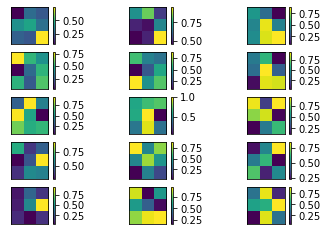

Conv5


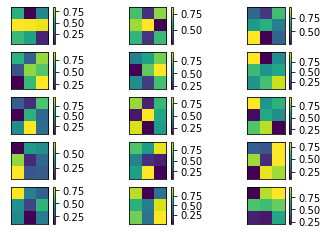

Conv8


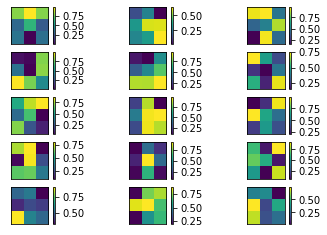

Conv13


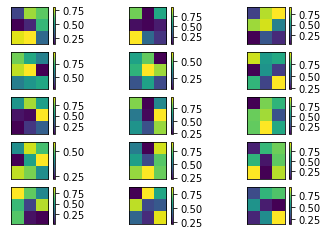

Conv16


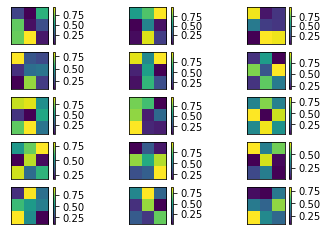

In [ ]:
#print(model.layers[0].get_weights())
#ye filters mtlb kernels 

# aapone fikter dekhe
 # aap 1st wor ka 1st filter
 #mind mae rkho , ki kesa dikhtabhai , thodi der kenliye , onoly 1st row ka 1st element

# retrieve weights from the second hidden layer
ConvLayerIndex = [0,5,8,13,16]
from matplotlib import pyplot
for j in ConvLayerIndex : 
    filters, biases = model.layers[j].get_weights()
    print("Conv"+str(j))
    # normalize filter values to 0-1 so we can visualize them
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)
    
    # plot first few filters
    n_filters, ix = 5, 1#okk smjgyi m.
    for i in range(n_filters):
        # get the filter
        f = filters[:, :, :, i]
        # plot each channel separately ek min suno ! jbo olyoe summary thi na usme prameters btana kaise kaise aye hue 
        #vo parameters mtlb , ki wires hai ek neuron se jo dusra neurons judrha hai , vo kitni wires hai achatheke
        for j in range(3):
            # specify subplot and turn of axis
            ax = pyplot.subplot(n_filters, 3, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            mp='viridis'
            c = pyplot.imshow(f[:, :, j],cmap=mp)
            c.set_cmap(mp)
            pyplot.colorbar()
            ix += 1
    # show the figure
    pyplot.show()
  #ye dekho ye filters hai , ye is prakar hai
  # R G B , jo ye vala hai first row m first column ye Red color vale channel ke loye hai
  ##2nd vala Green color ke channel ke loye hai , 3rd vabla Blue ke liye
  # to ye total 32 alag alag filters hai , mtlb 1 image ko hum alag alag 32 filter se multiply kr rkd h2e hai
  #and 1 image ko 32 image bna rhe hai single image ko , fr use aage bheji ja rhi or network ke andar
  # ye filter change tb honge jb error pta chla hme , fr vha se reverse back hoga error , or in filters ko update kr dega
  #inki values ko change kr dega taki error ku aaye filter acha bne , ek bari ye image dekhko starting ki , dhyan mae rkhna kesi hai
  # fr model = Sequantial() se dibara run kro 1 /1 aapko dekha ye randon numbers  hai  ye ese update hota rhega 
  # error aane pr finally jb error bhtt kum hojayega tk ye filter best filter mana jayega
  #or ye sb bs numbers hai 0 to 1 

  #dekho , ye jo filters hai na , ye 3 channels ke liye hai
  #aapne upar dekh na model.summary() se pehle
  #hmne likha tha sb 1st line thi jisme
  #model.add(Conv2d(32,(3,3)))
  #to jo ye 32 hai na , ye filters hai ,
  #filters hota kuch ni z bs random numbers hai 0 to 1 ke bich mae , jisko 
  #hum color ke husab se dekh rhe hai , ho ye rha hai 
  #ki random number generate hora , jisse ek 3 x 3 ki matrix bn rhi hai
  # 1 row R G B ko drsha rha hai
  
  #mtlb , 1st row ka jo 1st vala filter hai
  # vo picture ke Red channel se multiply hoga
  # jo 1st row 2nd filter hai , vo green channel se multiply hoga usi image ke
  #3rd vala blue se  fr insbko add krke , inme ek bias add kiya jayega
  #bias b ek random number hota , usse jo final result aayega vo 1st filter se bni hui
  #image hogi 
  #aapko abhi ye dekhata , ki ye srf random number hote hai , abhi aap sbne mind mae rkhliya na konsa color kha hai ?
  #  1st row 1st filter Red vala ok# colors dekho yaad ho

  
  
  #  konsa color kha hai , 1st row ke 1st elemt ka
# ise temperoary dyan mae rkho , abhi  ye random generated hote 

In [ ]:
ImageFiles = listdir('/content/Test/')
randomNum = random.randint(0,len(ImageFiles))
img_path = f"/content/Test/{ImageFiles[randomNum]}"
img = image.load_img(img_path, target_size=(224, 224))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255
plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)

##ye ek image utai test mae se random 
#isko hum CONV2d ka jo 1st line thi na usme dalenge 

#ye image conv0 ki 1st row se muliply hogi ,  RGB 3no chanels ke filter alag hai , vo 1 hi filter hai 1st row mae
#total 32 filters hai . ,
#
##pehle 1 hi filter ka dekho kesa dekhega , image ko change krna to same cell run krdo dobara ... to isme ye random image uthara h z banjj ,uoar code dekho , vhi same haj

#ye koo random image utahi fike mae se 
#ab kya kra hmne , iske 3 channels honge RGB Jisme G jayeda gai hna
#ab jo  fikter dekhaya , uski 1st row se is image ko multiply krnege ek bari fr se filter dekho 1st row ke

In [ ]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:12]] # Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [ ]:
activations = activation_model.predict(img_tensor) #
print(len(activations))

In [ ]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')
#ye jo   name change kr ra , jet , viridis , ye color map hai , mtlb kis gradient colors mae  dekhayega
#filters hmne jet form mae dekhe z mtlb smjlo color combination hai 
#ye ki low number se lekr high number 0 to 1 mae , colors kese light se dark homge ya dark se light 
#ye 1st conv2d mae gyi image hmari , R ke alag se filter mila , G ka alag multiply hua and B ka alag , then unko conbine kr diya yebimage bn Gyi , ye 1 filter use kra sirf , aage dekhna saee 32 filter kese use honge
#abhi  ek bari fr se upar se image change kdo ,ab vo srf 2 akshar 32 , likhne se kya hua

# ye dekho , jb jmne 1st filter ke sath muliply kia to image kesi ho gyi


In [ ]:

# ab  ye kernel multiply hua kese jo aapko image dekhk , uske jpar kernel ko multiply kese kra

In [ ]:
layer_names = []
print(len(model.layers))
print(len(activations))

In [ ]:
 for layer in model.layers[:12]:
    layer_names.append(layer.name)
print(layer_names) # Names of the layers, so you can have them as part of your plot   
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :,col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    #conv1 vala Dekho, jo ye first imahe hai hmne upar dekhi thi 
    #1 line mae 16 images hai
    #jo uoar filters dekhaye , unse multiply hui hai ye , 32 filter se 1 image muktiply hui  then 1 image 32 images mae bat gyi 

  
    
    #jha blaxk and white vale fikters dekhaye na aapko vha 4 ya 5 likh rkha 32blikjoge , sare filters dekh jayenge
    #lekin size bhtt snall higa , to 5 / 6 tk dekhan , ek bari 32 try maar kena ki kesa dekga okk , abhi krke dekhlo , aapko pta lg jayega network bnta kesebhai
   
  
   #sare 32 kernel kk hmne is singke image ke sath multiply kra , different different images bngyi isse
   # in images mae kuch negative calue b hogi kuch positive 
  
   ##negative mtlb 
   #ye abhi hmne image 1st layer conv1 mae dali 
   #ab hum activation function lga rhe hai , relu jo negative values ko 0 kr dega
   #and positive same rhegi   
    8
     
    

In [ ]:
layer_outputs = [layer.output for layer in model.layers[12:20]] # Extracts the outputs after 12 layers
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) #are eun ku krre ho ? abhi 1 layer smjhk , 8 layers hai upar muje lga apne nbila niche kro


In [ ]:
activations = activation_model.predict(img_tensor) #
print(len(activations))

In [ ]:
 first_layer_activation = activations[1] # 8,13,16
print(first_layer_activation.shape)
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')
#ye aapko droupout vale neuron mae dkegay kesa hota droupout vala neuron z bhtt kum activate hkta bhtt mum z activate to 
#hota hai , pr namatra jitni value

In [ ]:
layer_names = []
print(len(model.layers))
print(len(activations))

In [ ]:
 for layer in model.layers[12:20]:
    layer_names.append(layer.name)
print(layer_names) # Names of the layers, so you can have them as part of your plot   
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :,col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

 
<h3>Flatten</h3>
<img src="https://missinglink.ai/wp-content/uploads/2019/04/Group-5-700x383.png"/>

<h3>Dense Layer</h3>
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSSxEkECdZYbtDNrGhzkvld4ACVW96CVoJThQ&usqp=CAU"/>